# tuning threshold of LG3:

only measure through   (  50% test (justhusky + newpatho) )

In [9]:
import gzip
import pandas as pd
import numpy as np
from joblib import dump, load

from numpy import sqrt
from numpy import argmax

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

import sklearn.metrics as metrics

from sklearn.metrics import precision_recall_curve

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import ipywidgets as widgets
from ipywidgets import interact, interactive


from sklearn.metrics import average_precision_score


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# measure the threshold

## get model

In [11]:
lr = load('/Users/nancy/Desktop/RS_projects/result/04_ML_modify/01_retrainModel_ClinvarJusthuskyNewpatho/models/02_12feats_ClinJustPatho5-5_LG.joblib')

preprocessor = load ('/Users/nancy/Desktop/RS_projects/result/04_ML_modify/01_retrainModel_ClinvarJusthuskyNewpatho/models/02_12feats_ClinJustPatho5-5_preprocessor.joblib')

## get test data : 50% (just + newpatho)

In [12]:
## get half (just + newpatho) test data including rankscore:

merge_test_half_addrankscore = pd.read_csv('/Users/nancy/Desktop/RS_projects/result/04_ML_modify/01_retrainModel_ClinvarJusthuskyNewpatho/01_extract_oldRankscore_29feats_testhalf_JustNewpatho.csv')

In [13]:
# label encoder

df_1 = merge_test_half_addrankscore.copy()

map_clnsig={'Pathogenic':1,'Benign':0}
df_1['CLNSIG']=df_1['CLNSIG'].map(lambda s: map_clnsig.get(s) if s in map_clnsig else s)
df_1["CLNSIG"].unique()

array([0, 1])

In [14]:
""" 1. choose featuresV1"""

featureV1 = ['CLNSIG',
'CADD',
'Frq',
'GNOMADAF_popmax',
'Consequence',
'BIOTYPE',
'PolyPhen',
'REVEL_score',
'pLI_gene_value',
'SpliceAI_pred_DS_AG',
'SpliceAI_pred_DS_AL',
'SpliceAI_pred_DS_DG',
'SpliceAI_pred_DS_DL']         # keep CLNSIG, 12 + 1

df_1 = df_1 [featureV1]
df_1

,CLNSIG,CADD,Frq,GNOMADAF_popmax,Consequence,BIOTYPE,PolyPhen,REVEL_score,pLI_gene_value,SpliceAI_pred_DS_AG,SpliceAI_pred_DS_AL,SpliceAI_pred_DS_DG,SpliceAI_pred_DS_DL
0,0,1.425,0.10410,0.592200,upstream_gene_variant,processed_transcript,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1.488,0.04540,0.125000,upstream_gene_variant,processed_transcript,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7.003,0.22580,0.260300,upstream_gene_variant,processed_transcript,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0.825,0.26760,0.601800,intron_variant,processed_transcript,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0.279,0.30020,0.577700,intron_variant,processed_transcript,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288121,1,38.000,0.00014,NaN,stop_gained,protein_coding,NaN,NaN,0.89,0.00,0.00,0.0,0.0
2288122,1,38.000,0.00014,NaN,stop_gained,protein_coding,NaN,NaN,0.89,0.03,0.00,0.0,0.0
2288123,1,29.800,0.00014,NaN,missense_variant,protein_coding,probably_damaging,0.516,1.00,0.26,0.03,0.0,0.0
2288124,1,27.700,0.00014,NaN,missense_variant,protein_coding,probably_damaging,0.580,0.99,0.00,0.00,0.0,0.0


In [15]:
X_test, y_test = df_1.iloc[:, 1:], df_1.iloc[:, 0]

In [16]:
lr.classes_

array([0, 1])

In [17]:
### predict by model

pipeline = make_pipeline(preprocessor, lr)


# predict probabilities
y_proa = pipeline.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_proa = y_proa[:, 1]



## using plots: 
https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

### check ROC

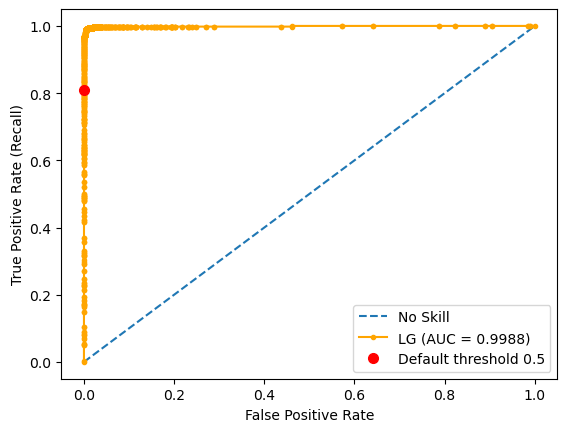

In [18]:
#######  original ROC

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_proa)


## count AUC
roc_L = metrics.auc(fpr, tpr)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LG '+ '(AUC = ' + str("%.4f" % roc_L+')'),color='orange')

# add defalut threshold of LG 
default_threshold_LG = np.argmin(np.abs(thresholds - 0.5))
# add ROC curve threshold of our LG model in plot
plt.plot(
    fpr[default_threshold_LG],
    tpr[default_threshold_LG],
    "or",
    markersize=7,
    label="Default threshold 0.5"
)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.001803, G-Mean=0.994


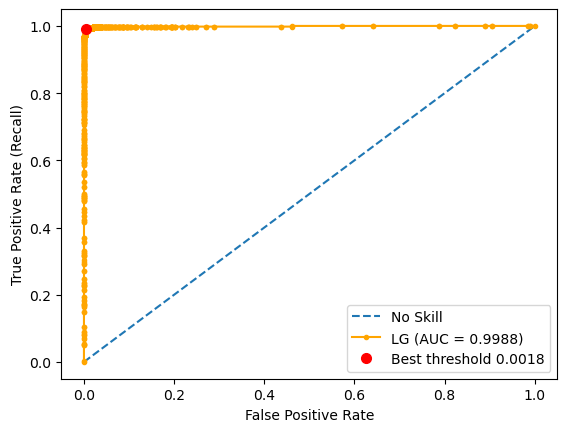

In [19]:
###### find best threshold : G-mean

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


## count AUC
roc_L = metrics.auc(fpr, tpr)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LG '+ '(AUC = ' + str("%.4f" % roc_L+')'),color='orange')

## add best threshold
plt.plot(
    fpr[ix], tpr[ix],
    "or",
    markersize=7,
    label="Best threshold 0.0018"
)
# plt.scatter(fpr[ix], tpr[ix], marker='o', "or", color='red', label='Best')  # s = 80 :  chage  size



# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
# show the plot
plt.show()

### Precision-recall curve

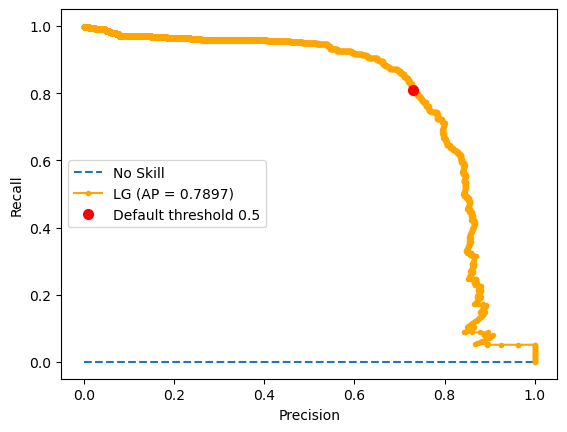

In [20]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proa)
# plot 

# add AP socre = the area under the PR curve
ap_lr = average_precision_score(y_test, y_proa)



no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(precision, recall, marker='.', label='LG'+ ' (AP = ' + str("%.4f" % ap_lr +')'), color='orange')


# add defalut threshold of LG 
plt.plot(
    precision_score(y_test, pipeline.predict(X_test)),
    recall_score(y_test, pipeline.predict(X_test)),
    "or",
    markersize=7,
    label="Default threshold 0.5",
)



# axis labels
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.365123, F-Score=0.777


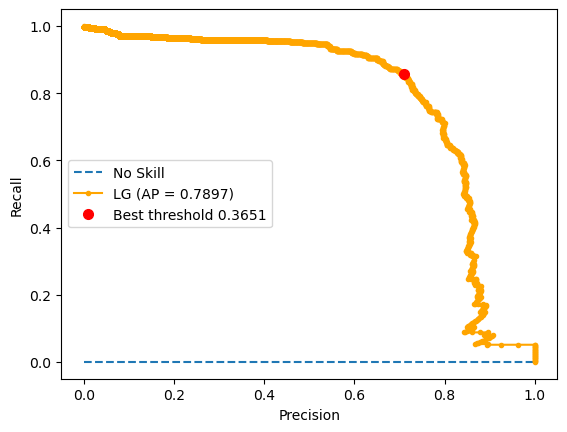

In [21]:
###### find best threshold : f1-score

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))


# add AP socre = the area under the PR curve
ap_lr = average_precision_score(y_test, y_proa)


no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(precision, recall, marker='.', label='LG'+ ' (AP = ' + str("%.4f" % ap_lr +')'), color='orange')

## add best threshold
plt.plot(
    precision[ix],
    recall[ix],
    "or",
    markersize=7,
    label="Best threshold 0.3651",
)
# plt.scatter(recall[ix], precision[ix], marker='o', color='red', label='Best',s =80)


# axis labels
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
# show the plot
plt.show()

## using grid searchvarious values:  Precision/Recall tradeoff
https://ubc-cs.github.io/cpsc330/lectures/09_classification-metrics.html#receiver-operating-characteristic-roc-curve

In [22]:
## sweep through different thresholds.

thresholds = np.arange(0.0, 1.0, 0.05)
thresholds

def f(threshold):
    preds = pipeline.predict_proba(X_test)[:, 1] > threshold    
    print("Threshold: ", np.round(threshold,4))
    print("Precision: ", np.round(precision_score(y_test, preds),4))
    print("Recall: ", np.round(recall_score(y_test, preds), 4))    
    print("f1 score: ", np.round(f1_score(y_test, preds), 4))       



import ipywidgets as widgets
from ipywidgets import interact, interactive

interactive(
    f,
    threshold=widgets.FloatSlider(min=0, max=0.9, step=0.05, value=0.5),
)

interactive(children=(FloatSlider(value=0.5, description='threshold', max=0.9, step=0.05), Output()), _dom_cla…

In [23]:
# view P and R for different thresholds as a dataframe.

pr_dict = {"threshold": [], "precision": [], "recall": [], "f1 score": []}
for threshold in thresholds:
    preds = pipeline.predict_proba(X_test)[:, 1] > threshold
    pr_dict["threshold"].append(threshold)
    pr_dict["precision"].append(precision_score(y_test, preds))
    pr_dict["recall"].append(recall_score(y_test, preds))
    pr_dict["f1 score"].append(f1_score(y_test, preds))
pd.DataFrame(pr_dict) 

,threshold,precision,recall,f1 score
0,0.00,0.000214,1.000000,0.000427
1,0.05,0.446463,0.955010,0.608469
2,0.10,0.550060,0.932515,0.691958
3,0.15,0.610354,0.916155,0.732625
4,0.20,0.641100,0.905930,0.750847
5,0.25,0.662595,0.887526,0.758741
6,0.30,0.685393,0.873211,0.767986
7,0.35,0.706577,0.856851,0.774492
8,0.40,0.713793,0.846626,0.774556
9,0.45,0.720354,0.832311,0.772296


In [30]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

pr_dict = {"threshold": [], "precision": [], "recall": [], "f1 score": [], "TN": [], "FP": [], "FN": [], "TP": []}

for threshold in thresholds:
    preds = pipeline.predict_proba(X_test)[:, 1] > threshold
    pr_dict["threshold"].append(threshold)
    pr_dict["precision"].append(precision_score(y_test, preds))
    pr_dict["recall"].append(recall_score(y_test, preds))
    pr_dict["f1 score"].append(f1_score(y_test, preds))
    
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    pr_dict["TN"].append(tn)
    pr_dict["FP"].append(fp)
    pr_dict["FN"].append(fn)
    pr_dict["TP"].append(tp)

pd.DataFrame(pr_dict)

,threshold,precision,recall,f1 score,TN,FP,FN,TP
0,0.00,0.000214,1.000000,0.000427,0,2287637,0,489
1,0.05,0.446463,0.955010,0.608469,2287058,579,22,467
2,0.10,0.550060,0.932515,0.691958,2287264,373,33,456
3,0.15,0.610354,0.916155,0.732625,2287351,286,41,448
4,0.20,0.641100,0.905930,0.750847,2287389,248,46,443
5,0.25,0.662595,0.887526,0.758741,2287416,221,55,434
6,0.30,0.685393,0.873211,0.767986,2287441,196,62,427
7,0.35,0.706577,0.856851,0.774492,2287463,174,70,419
8,0.40,0.713793,0.846626,0.774556,2287471,166,75,414
9,0.45,0.720354,0.832311,0.772296,2287479,158,82,407


In [31]:
threshold_tuning = pd.DataFrame(pr_dict) 
threshold_tuning.to_csv('/Users/nancy/Desktop/RS_projects/result/04_ML_modify/03_modify_parameter/01_threshold_tuning.csv',index=False)

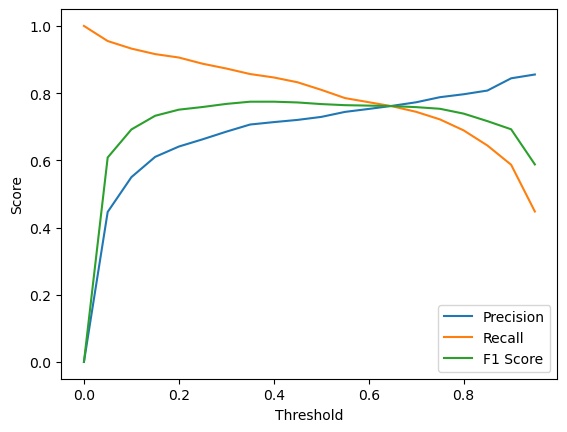

In [24]:
metrics = pd.DataFrame(pr_dict) 


# create the plot
plt.plot(metrics['threshold'], metrics['precision'], label='Precision')
plt.plot(metrics['threshold'], metrics['recall'], label='Recall')
plt.plot(metrics['threshold'], metrics['f1 score'], label='F1 Score')

# add axis labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

# show the plot
plt.show()


# try prediction ouput by threshold

## try threshold 0.6
LG

In [25]:


# predict probabilities for X_test
y_probs = pipeline.predict_proba(X_test)


# set the new threshold to 0.6
threshold = 0.6

# classify based on the new threshold
y_pred = np.where(y_probs[:,1] >= threshold, 1, 0)


In [26]:
##  evaluate metics

TN, FP, FN, TP = confusion_matrix(y_test,y_pred).ravel()
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)
print('TP :',TP)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

TN: 2287513
FP: 124
FN: 111
TP : 378
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2287637
           1       0.75      0.77      0.76       489

    accuracy                           1.00   2288126
   macro avg       0.88      0.89      0.88   2288126
weighted avg       1.00      1.00      1.00   2288126



## try threshold 0.55
LG

In [27]:
# set the new threshold to 0.6
threshold = 0.55

# classify based on the new threshold
y_pred = np.where(y_probs[:,1] >= threshold, 1, 0)


TN, FP, FN, TP = confusion_matrix(y_test,y_pred).ravel()
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)
print('TP :',TP)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


TN: 2287505
FP: 132
FN: 105
TP : 384
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2287637
           1       0.74      0.79      0.76       489

    accuracy                           1.00   2288126
   macro avg       0.87      0.89      0.88   2288126
weighted avg       1.00      1.00      1.00   2288126

